## IMPORT DATA FOR MACHINE LEARNING

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

from pathlib import Path

In [2]:
#import train data
train_df = pd.read_csv(
    Path('../data/train.csv')
    )

In [3]:
#review trained data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#show summary statistics on train dataset
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#check missing data on train dataset
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#import test data
test_df = pd.read_csv(
    Path('../data/test.csv')
    )

In [7]:
#reivew test data
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
#show summary statistics on test dataset
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
#check missing data on test dataset
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## PREPROCESS, ENCODE & DATA CLEANUP

In [10]:
#set loan status dataframe for y 
loan_status = train_df.Loan_Status

In [11]:
#we can now drop loan status from train dataframe
#train_df.drop('Loan_Status', axis=1, inplace=True) 

In [12]:
#set loan ID dataframe
Loan_ID_df = test_df.Loan_ID

In [13]:
#append test and train dataframe
loan_data_df = train_df
#train_df.append(test_df)

In [14]:
#preview new train and test appended dataframe
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
#confrim appended dataframe size
loan_data_df.shape

(614, 13)

In [16]:
#show summary statistics on new dataframe
loan_data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
#check for null value
loan_data_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

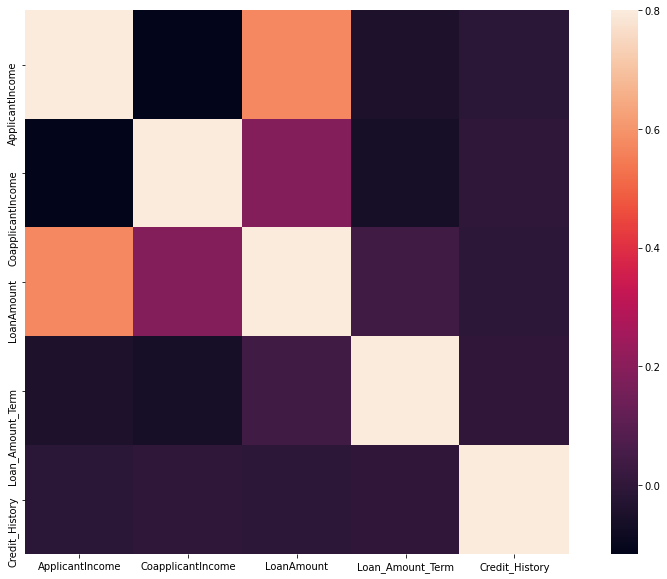

In [18]:
#show correlation on heatmap
%matplotlib inline
corrmat=loan_data_df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [19]:
#loan amount and applicant income are highly correlated which is to be expected

In [20]:
loan_data_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
#count how many married vs single
loan_data_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
#count Gender
loan_data_df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
#count how many males vs females
loan_data_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
loan_data_df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [25]:
loan_data_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
loan_data_df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [27]:
loan_data_df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [28]:
loan_data_df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
loan_data_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

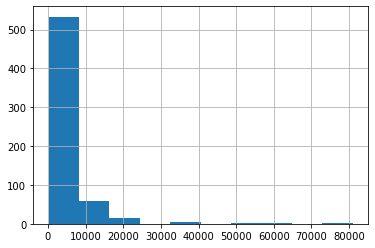

In [30]:
#show histogram -skewed and should be normalized
loan_data_df['ApplicantIncome'].hist()

<AxesSubplot:>

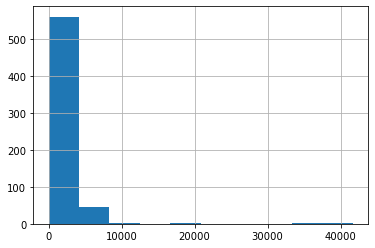

In [31]:
#show histogram -skewed and should be normalized
loan_data_df['CoapplicantIncome'].hist()

<AxesSubplot:>

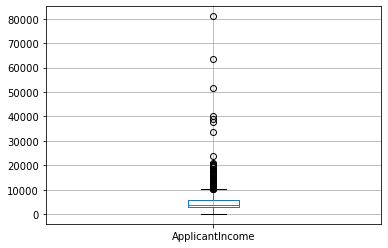

In [32]:
#show boxplot of income (lots of outliers)
loan_data_df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

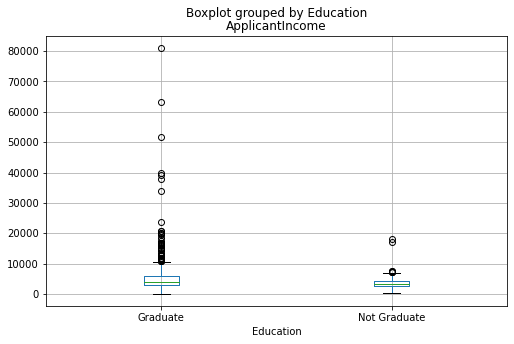

In [33]:
#show applicant education and salary
loan_data_df.boxplot(column='ApplicantIncome', by ='Education', figsize=(8,5))

<AxesSubplot:>

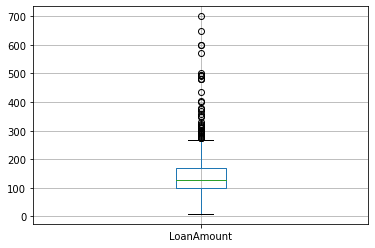

In [34]:
#boxplot on loan amount
loan_data_df.boxplot(column='LoanAmount')
#more outliers

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

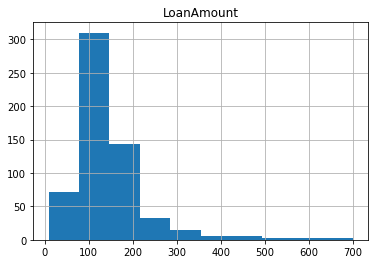

In [35]:
#loan amount histogram
loan_data_df.hist(column='LoanAmount')
#right skewed

<AxesSubplot:>

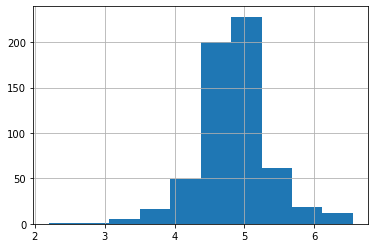

In [36]:
#normalize loanamount with log
loan_data_df['LoanAmount_log']= np.log(loan_data_df['LoanAmount'])
loan_data_df['LoanAmount_log'].hist()

<AxesSubplot:>

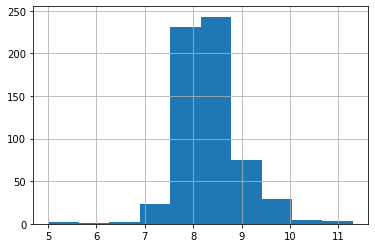

In [37]:
#normalize applicant income
loan_data_df['ApplicantIncome_log']= np.log(loan_data_df['ApplicantIncome'])
loan_data_df['ApplicantIncome_log'].hist()

In [38]:
#normalize Coapplicant income
#loan_data_df['CoapplicantIncome_log']= np.log(loan_data_df['CoapplicantIncome'])
#loan_data_df['CoapplicantIncome_log'].hist()

In [39]:
#show dataframe before encoding
loan_data_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515


In [40]:
#show null values
loan_data_df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log         22
ApplicantIncome_log     0
dtype: int64

In [41]:
#fill missing Gender with MODE
loan_data_df['Gender'].fillna(value=loan_data_df['LoanAmount'].mode()[0], inplace=True)

In [42]:
#fill missing loan amount with MEAN
loan_data_df['LoanAmount'].fillna(value=loan_data_df['LoanAmount'].mean(), inplace=True)

In [43]:
#fill missing loan amount log that we created when normalizaing with MEAN
loan_data_df['LoanAmount_log'].fillna(value=loan_data_df['LoanAmount_log'].mean(), inplace=True)

In [44]:
#fill missing Married with MODE
loan_data_df['Married'].fillna(value=loan_data_df['Married'].mode()[0], inplace=True)

In [45]:
#fill missing loan amount term column with MEAN
loan_data_df['Loan_Amount_Term'].fillna(value=loan_data_df['Loan_Amount_Term'].mean(), inplace=True)

In [46]:
#fill missing Credit_History column with MEAN
loan_data_df['Credit_History'].fillna(value=loan_data_df['Credit_History'].mode()[0], inplace=True)

In [47]:
## Filling Self_Employed with MODE
loan_data_df['Self_Employed'].fillna(value=loan_data_df['Self_Employed'].mode()[0], inplace=True)

In [48]:
## Filling Dependents with MODE
loan_data_df['Dependents'].fillna(value=loan_data_df['Dependents'].mode()[0], inplace=True)

In [49]:
loan_data_df['Loan_Amount_Term'].fillna(value=loan_data_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [50]:
loan_data_df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
ApplicantIncome_log    0
dtype: int64

In [51]:
#label encode all categories in a function

def encode1(Loan_Status):
        if Loan_Status == 'Y':
            return 1
        else:
            return 0

def encode2(Gender):
        if Gender == 'Male':
            return 1
        else:
            return 0   

def encode3(Married):
        if Married == 'Yes':
            return 1
        else:
            return 0  

def encode4(Education):
        if Education == 'Graduate':
            return 1
        else:
            return 0  

def encode5(Self_Employed):
        if Self_Employed == 'Yes':
            return 1
        else:
            return 0  

def encode6(Property_Area):
        if Property_Area == 'Urban':
            return 1
        elif Property_Area == 'Rural':
            return 0
        else:
            return 2

def encode7(Dependents):
        if Dependents == '0':
            return 0
        elif Dependents == '1':
            return 1
        elif Dependents == '2':
            return 2    
        else:
            return 3
        
def encode8(Loan_Status):
        if Loan_Status == 'Y':
            return 1
        else:
            return 0  

In [69]:
#encode train dataset
loan_data_df['Gender'] = loan_data_df["Gender"].apply(encode2)
loan_data_df['Married'] = loan_data_df["Married"].apply(encode3)
loan_data_df['Education'] = loan_data_df["Education"].apply(encode4)
loan_data_df['Self_Employed'] = loan_data_df["Self_Employed"].apply(encode5)
loan_data_df['Property_Area'] = loan_data_df["Property_Area"].apply(encode6)
loan_data_df['Dependents'] = loan_data_df["Dependents"].apply(encode7)
loan_data_df['Loan_Status'] = loan_data_df["Loan_Status"].apply(encode8)

#encode test dataset
test_df['Gender'] = test_df["Gender"].apply(encode2)
test_df['Married'] = test_df["Married"].apply(encode3)
test_df['Education'] = test_df["Education"].apply(encode4)
test_df['Self_Employed'] = test_df["Self_Employed"].apply(encode5)
test_df['Property_Area'] = test_df["Property_Area"].apply(encode6)
test_df['Dependents'] = test_df["Dependents"].apply(encode7)
#test_df['Loan_Status'] = test_df["Loan_Status"].apply(encode8)

In [53]:
#drop loan ID
#loan_data_df.drop('Loan_ID', inplace=True, axis=1)

In [54]:
#review dataframe after encoding & filling NA values
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,4.857444,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,8.430109
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4.787492,7.856707
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,4.948760,8.699515


<AxesSubplot:>

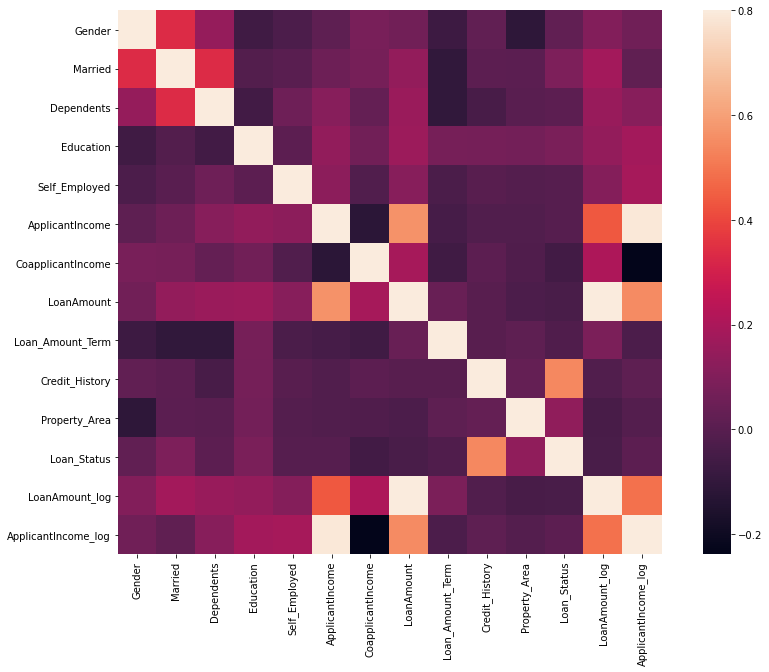

In [55]:
#show correlation on heatmap after encode
corrmat=loan_data_df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [56]:
#married and dependents are also correlated, unsurprisingly

## SPLIT THE X AND Y DATA

In [57]:
#initialize set x to independent variables
X = loan_data_df.iloc[:,np.r_[1:5,9:11,13:14]].values

In [58]:
#Review all independent variables
X

array([[  1.        ,   0.        ,   0.        , ..., 360.        ,
          1.        ,   4.85744418],
       [  1.        ,   1.        ,   1.        , ..., 360.        ,
          1.        ,   4.85203026],
       [  1.        ,   1.        ,   0.        , ..., 360.        ,
          1.        ,   4.18965474],
       ...,
       [  1.        ,   1.        ,   1.        , ..., 360.        ,
          1.        ,   5.53338949],
       [  1.        ,   1.        ,   2.        , ..., 360.        ,
          1.        ,   5.23110862],
       [  0.        ,   0.        ,   0.        , ..., 360.        ,
          0.        ,   4.89034913]])

In [59]:
#set y to loan status only dependent variable
y = loan_data_df.iloc[:,12].values

In [60]:
#Review y
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [61]:
#import test split x and y 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
print(X_train)

[[  1.           1.           0.         ... 360.           1.
    4.87519732]
 [  1.           0.           1.         ... 360.           1.
    5.27811466]
 [  1.           1.           0.         ... 360.           0.
    5.00394631]
 ...
 [  1.           1.           3.         ... 360.           1.
    5.29831737]
 [  1.           1.           0.         ... 360.           1.
    5.07517382]
 [  0.           1.           0.         ... 360.           1.
    5.20400669]]


In [63]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [64]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

## LOGITIC REGRESSSION AND RANDOM FOREST CLASSIFIER


In [65]:
#import linear regression machine learning model
from sklearn.linear_model import LogisticRegression

In [66]:
#import randomforest classifier learning model
from sklearn.ensemble import RandomForestClassifier

## FIT TO ML MODEL

In [67]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))

models.append(("Decision Tree",DecisionTreeClassifier()))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
scoring='accuracy'

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)

print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))